## Solving an Image Classification Problem - Handwritten number recognition

Our task is to accurately classify handwritten digits from the MNIST data set which contains 70000 28x28 images of numbers.

**Steps**:
1. Preprocessing
2. Model Development and Training
3. Model Evaluation



Import the required libraries for the project:

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, Dropout
from keras.models import load_model
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import roc_curve, auc

## 1. Preprocessing


In [ ]:
# Load the data from the MNIST data set and separate it into training and test data.
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Normalise the pixel values of each image to be between 0 and 1.
X_train = X_train / 255.0
X_test = X_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


## 2. Model Development and Training

In [ ]:
# Develop the layers of the neural network with respective sizes and activation functions:
model = tf.keras.Sequential() #Define NN type
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) # flattens the 28x28 image to a single row of pixel values, input layer is actually 784 neurons
model.add(tf.keras.layers.Dense(256, activation='relu')) # Add a layer of neurons with a dimensionality of 256
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax')) # Softmax for final layer to output probabilities

# Train the classifier  on the test data:
print('The model layers is {}: '.format(len(model.layers)))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Use sparse_categorical_crossentropy to maximise accuracy
model.fit(X_train, y_train, epochs=10, batch_size=128) #Train over 10 epochs with batch size 128

The model layers is 5: 
Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2891 - accuracy: 0.9147
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1197 - accuracy: 0.9639
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0854 - accuracy: 0.9728
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0662 - accuracy: 0.9796
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0566 - accuracy: 0.9819
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0480 - accuracy: 0.9845
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0418 - accuracy: 0.9865
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0349 - accuracy: 0.9883
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0322 - accuracy: 0.9890
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0

## 3. Model Evaluation

Use the trained model to predict the test data set values:

In [ ]:
predictions = model.predict(X_test) # Predict expected class probabilities
y_preds = np.argmax(predictions, axis=1) # Select the most probable class as the prediction

313/313 [==============================] - 0s 1ms/step


Save the model:

In [ ]:
model.save("digit_model.keras")

Summarise the structure of the NN:

In [ ]:
loaded_model = load_model('digit_model.keras')
loaded_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_50 (Dense)            (None, 256)               200960    
                                                                 
 dropout_23 (Dropout)        (None, 256)               0         
                                                                 
 dense_51 (Dense)            (None, 256)               65792     
                                                                 
 dense_52 (Dense)            (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Create a confusion matrix for each category:

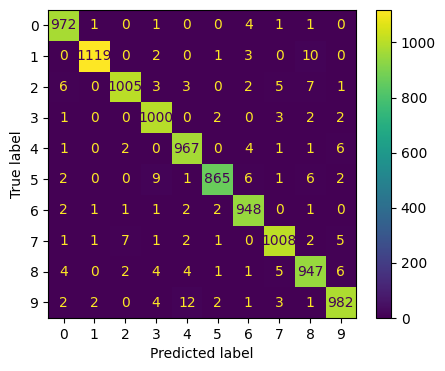

In [ ]:
fig, ax = plt.subplots(figsize = (5,4), dpi = 100) # Set figure hyperparameters
cm = confusion_matrix(y_test, y_preds) # Parse in test data and related predictions
cmp = ConfusionMatrixDisplay(cm, display_labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]) # List the classes
cmp.plot(ax=ax) #Display the plot.

Print evaluation metrics of the model:

In [ ]:
print(metrics.classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



For each category display a ROC curve:

313/313 [==============================] - 0s 1ms/step


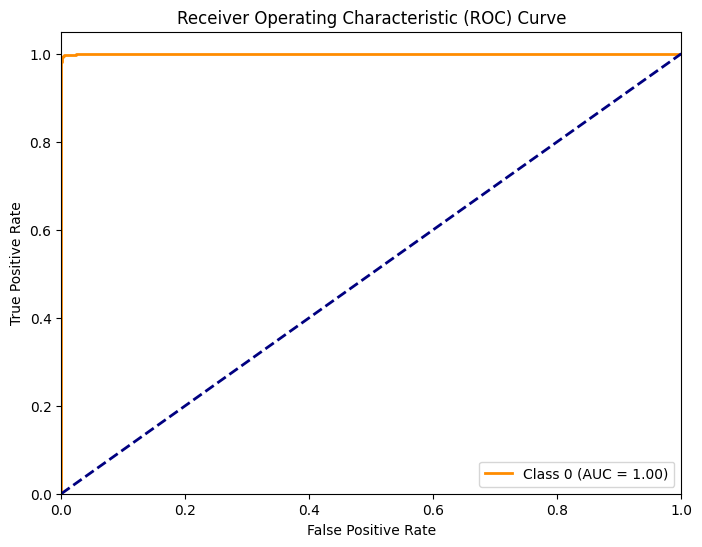

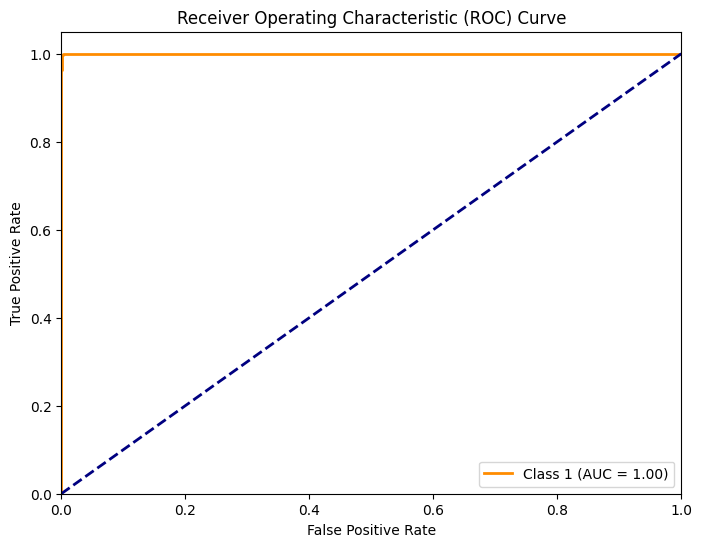

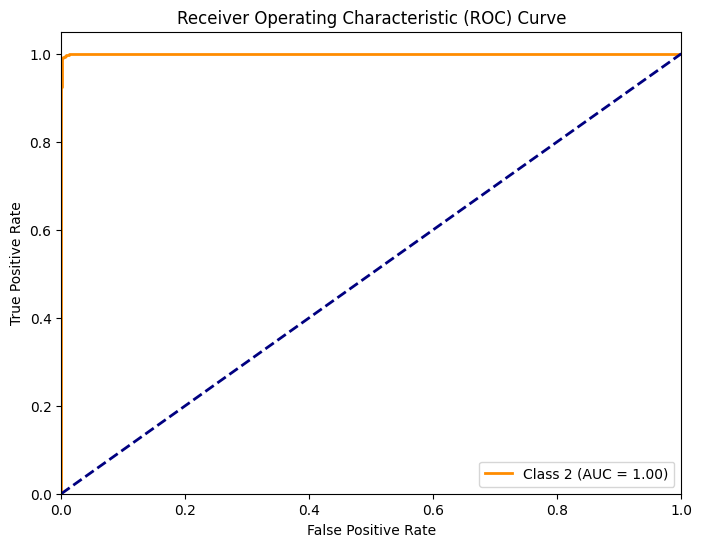

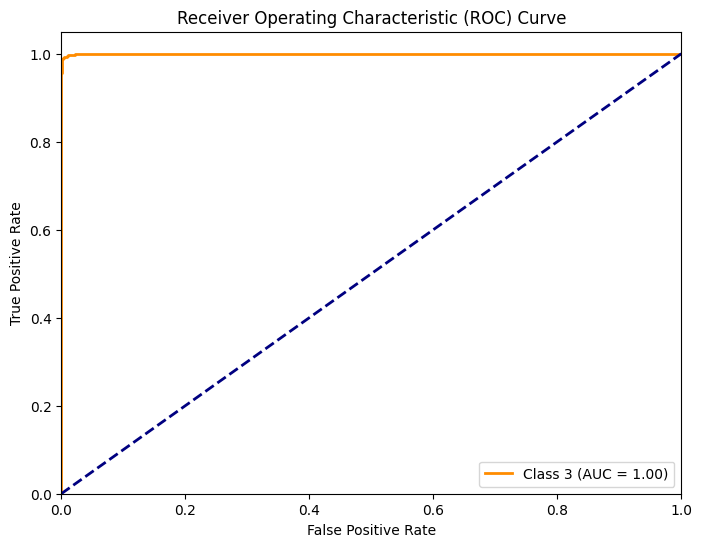

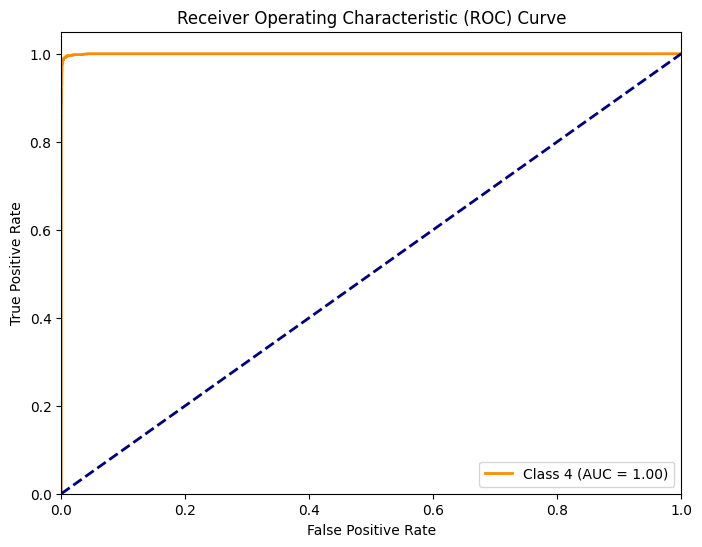

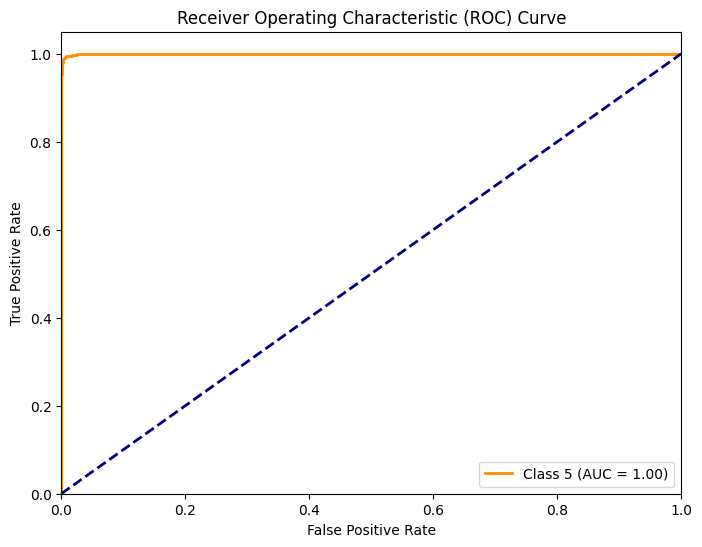

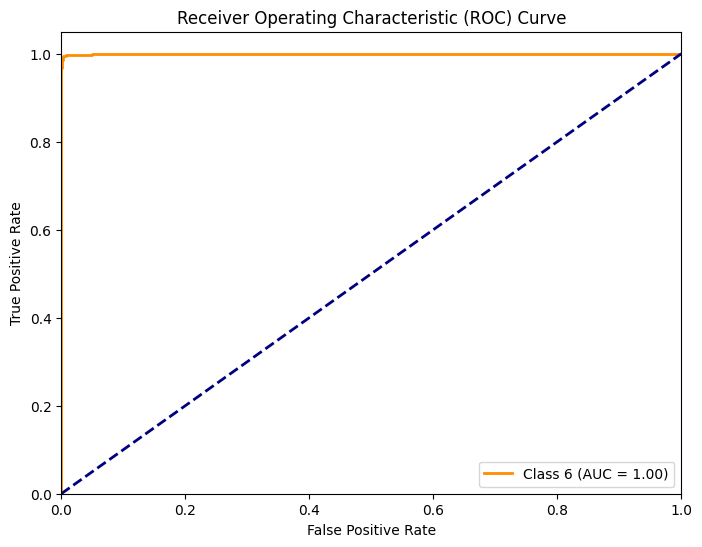

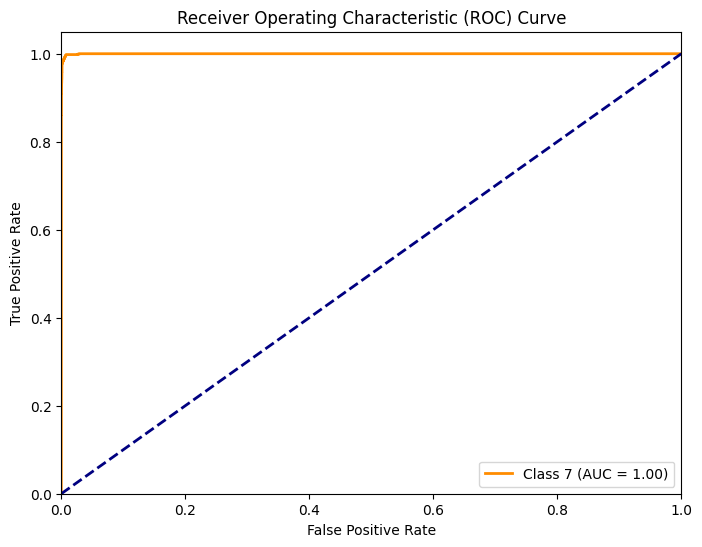

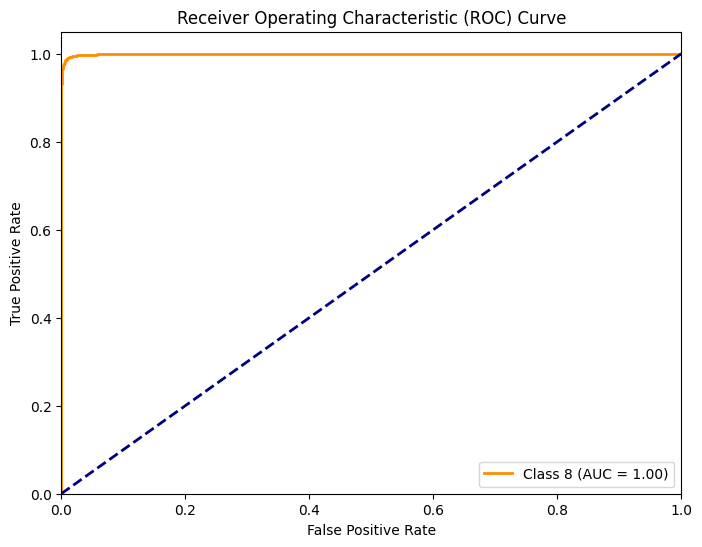

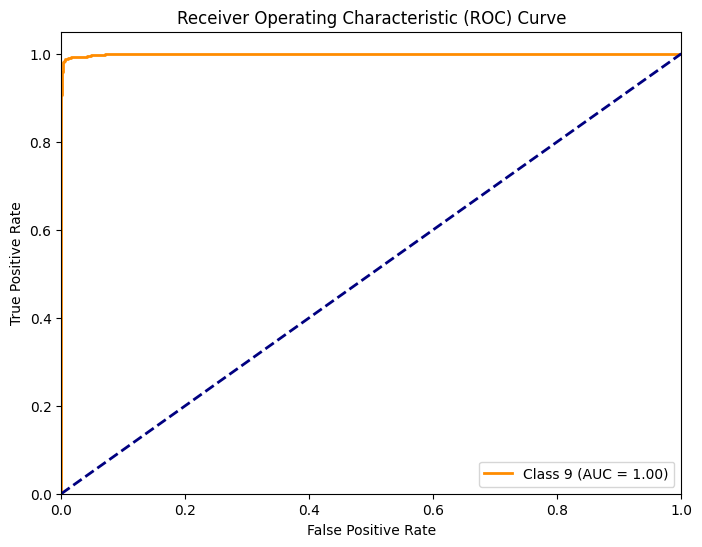

In [ ]:
y_pred_proba = loaded_model.predict(X_test) #Load the predicted categories of the test data set.

# Initialise required variables as dict:
fpr = dict()
tpr = dict()
roc_auc = dict()

#Create a ROC for each category by parsing in the FPR and TPR:
for i in range(10): # For each category
  fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_pred_proba[:, i]) #Calculate the FPR and TPR
  roc_auc[i] = auc(fpr[i], tpr[i]) # Generate the ROC curve

#Plot the ROC curves with outlined formatting:
for i in range(10):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr[i], tpr[i], color='darkorange', lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})') # Parse in FPR and TPR values

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

Link to the google drive directory:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Assignment 2 AI/digits')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read in and preprocess the second data set:

In [ ]:
images = []

# For each image in the digits folder, read it, normalise it and store it in images array.
for filename in os.listdir('/content/drive/My Drive/Assignment 2 AI/digits'):
  if filename.endswith('.png'):
    try:
      image_path = os.path.join('/content/drive/My Drive/Assignment 2 AI/digits', filename)
      image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) #Read image
      #Normalisation
      image.astype('float32') / 255.0
      cv2.resize(image, (28, 28))
      images.append(image) # Store image in array

    # Error handling
    except Exception as e:
      print(f"Error on {filename}: {str(e)}")
print(len(images))

39


Apply the classifier to the second test data set and view the results:

1/1 [==============================] - 0s 38ms/step


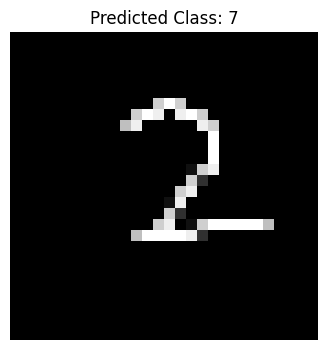

1/1 [==============================] - 0s 35ms/step


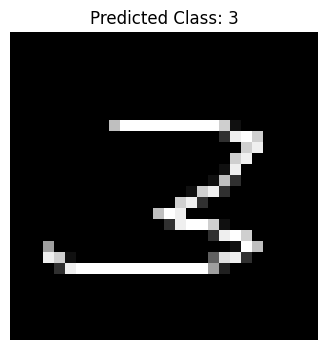

1/1 [==============================] - 0s 35ms/step


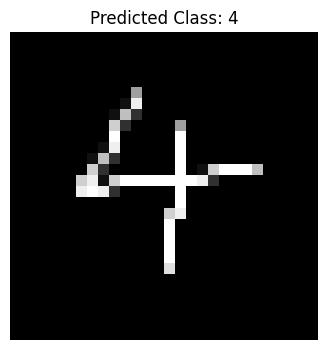

1/1 [==============================] - 0s 36ms/step


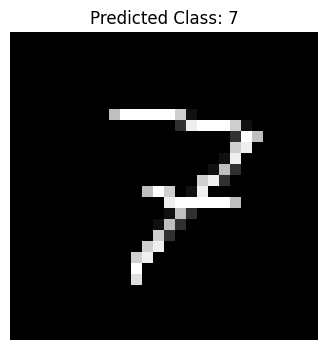

1/1 [==============================] - 0s 20ms/step


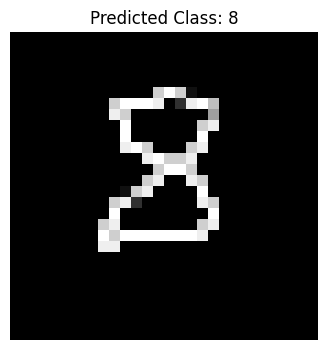

1/1 [==============================] - 0s 22ms/step


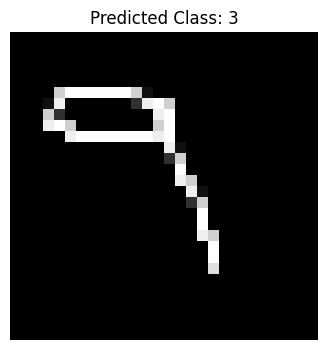

1/1 [==============================] - 0s 20ms/step


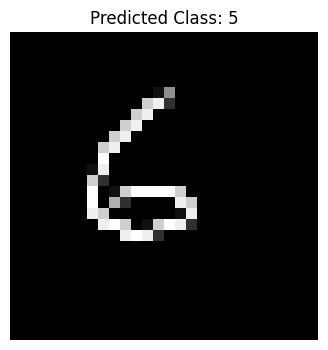

1/1 [==============================] - 0s 27ms/step


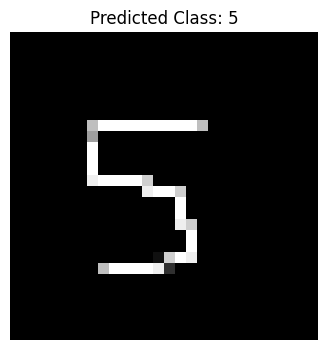

1/1 [==============================] - 0s 20ms/step


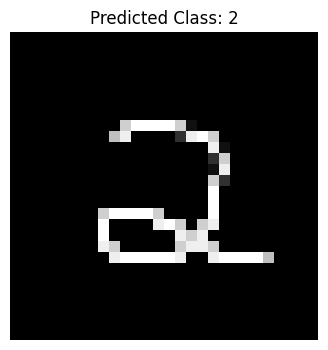

1/1 [==============================] - 0s 21ms/step


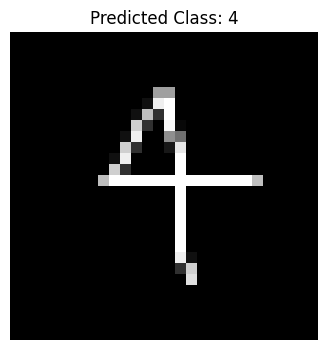

1/1 [==============================] - 0s 22ms/step


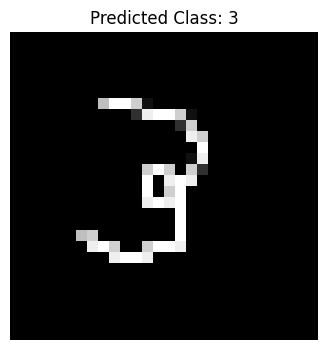

1/1 [==============================] - 0s 24ms/step


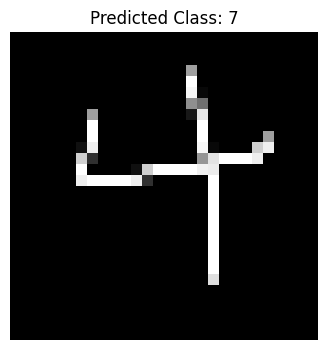

1/1 [==============================] - 0s 24ms/step


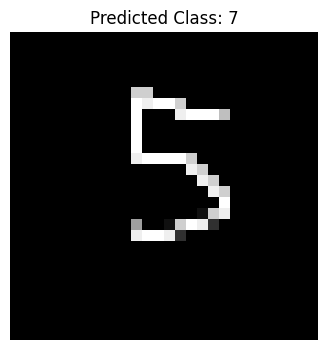

1/1 [==============================] - 0s 23ms/step


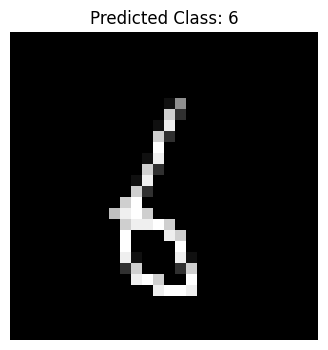

1/1 [==============================] - 0s 21ms/step


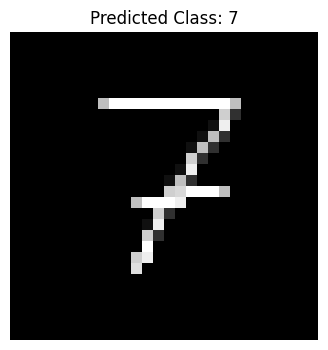

1/1 [==============================] - 0s 20ms/step


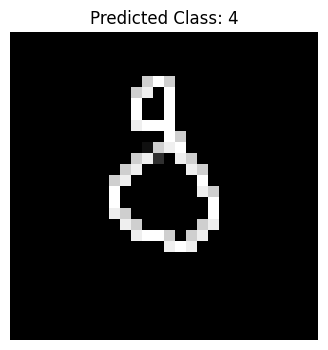

1/1 [==============================] - 0s 20ms/step


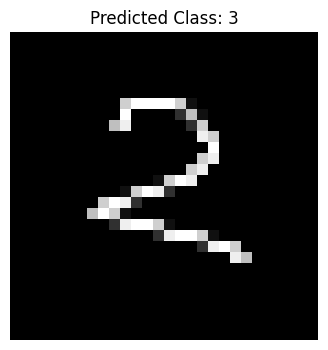

1/1 [==============================] - 0s 20ms/step


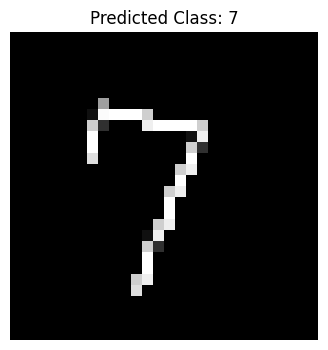

1/1 [==============================] - 0s 22ms/step


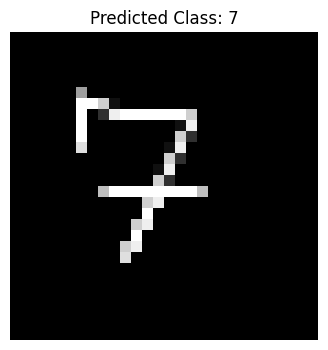

1/1 [==============================] - 0s 24ms/step


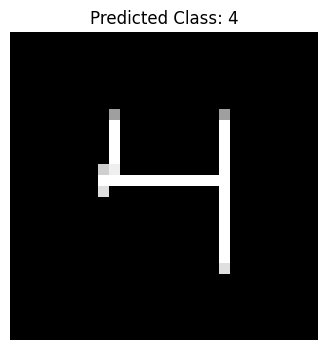

1/1 [==============================] - 0s 21ms/step


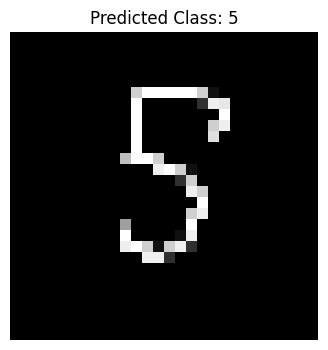

1/1 [==============================] - 0s 34ms/step


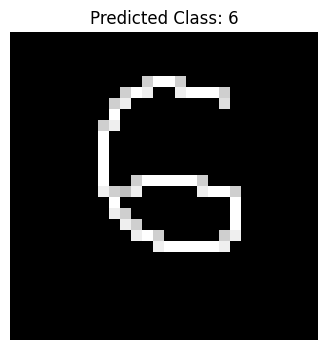

1/1 [==============================] - 0s 30ms/step


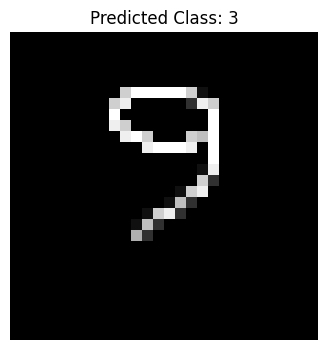

1/1 [==============================] - 0s 30ms/step


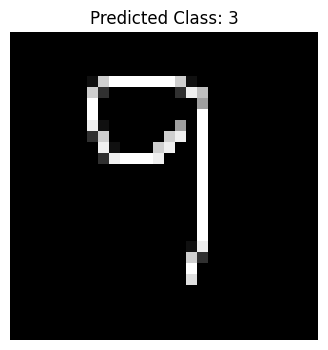

1/1 [==============================] - 0s 30ms/step


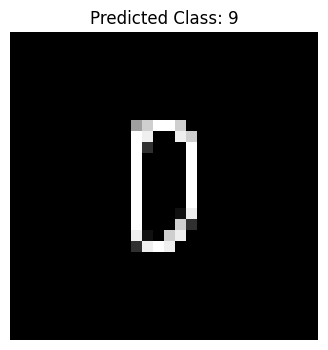

1/1 [==============================] - 0s 34ms/step


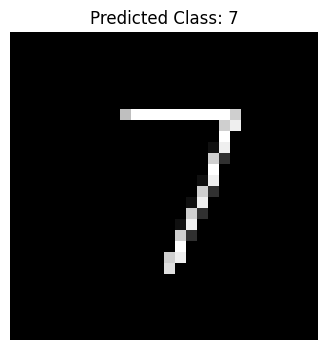

1/1 [==============================] - 0s 49ms/step


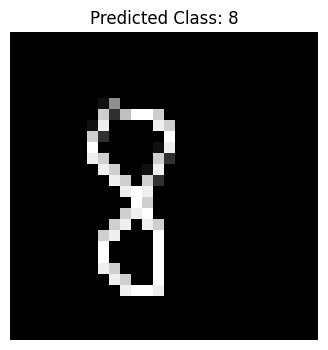

1/1 [==============================] - 0s 34ms/step


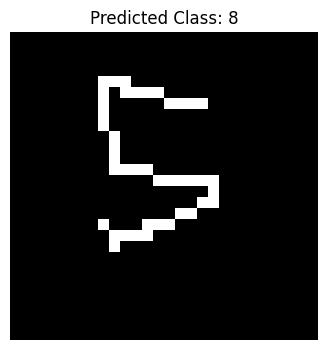

1/1 [==============================] - 0s 30ms/step


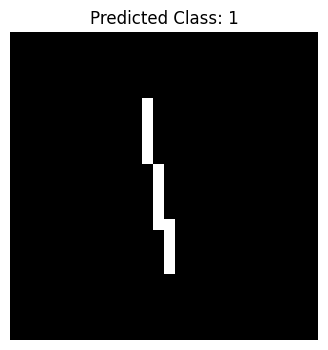

1/1 [==============================] - 0s 34ms/step


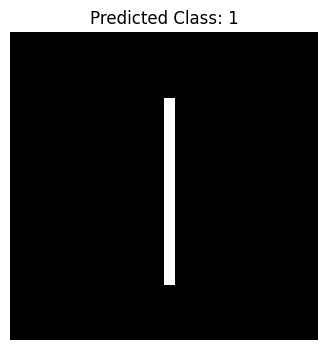

1/1 [==============================] - 0s 30ms/step


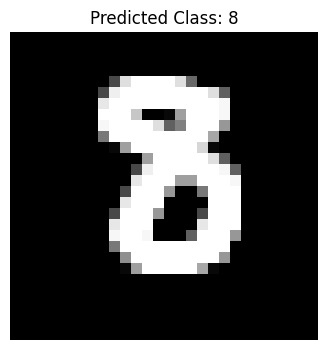

1/1 [==============================] - 0s 30ms/step


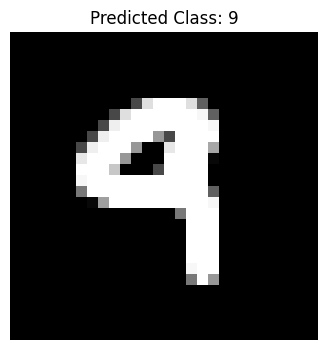

1/1 [==============================] - 0s 31ms/step


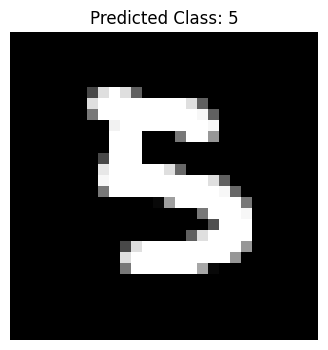

1/1 [==============================] - 0s 32ms/step


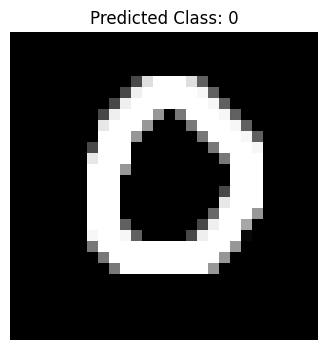

1/1 [==============================] - 0s 31ms/step


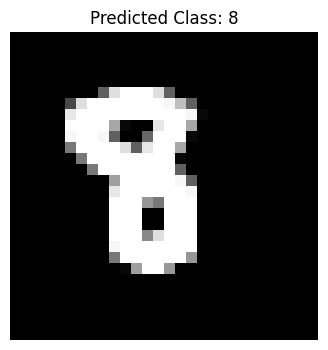

1/1 [==============================] - 0s 31ms/step


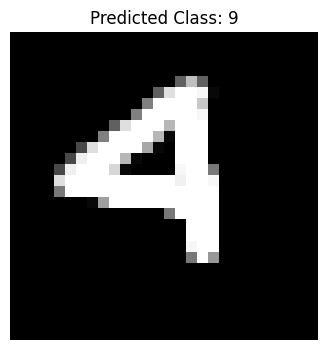

1/1 [==============================] - 0s 32ms/step


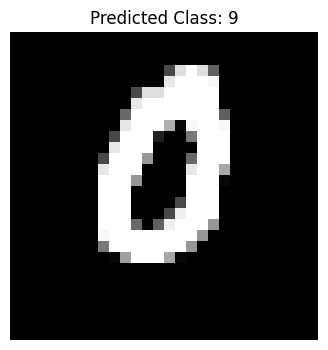

1/1 [==============================] - 0s 20ms/step


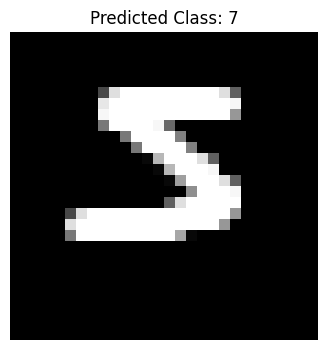

1/1 [==============================] - 0s 29ms/step


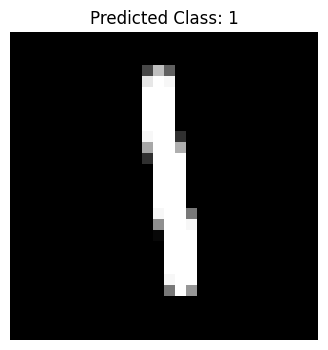

process complete


In [ ]:
labels = [2, 3, 4, 7, 8, 9, 6, 5, 2, 4, 3, 4, 5, 6, 7, 8, 2, 7, 7, 4, 5, 6, 9, 9, 0, 7, 8, 5, 1, 1, 8, 9, 5, 0, 8, 4, 0, 5, 1] # Correct labels for each image
all_predictions = []

for image in images:
  predictions = loaded_model.predict(np.expand_dims(image, axis=0))
  predicted_class = np.argmax(predictions, axis=1) # Take the best guess of the classifier for the given image's class
  all_predictions.append(predicted_class[0]) # Append the predicted class to the list
  # Create a figure to show the image and predicted class:
  plt.figure(figsize=(4, 4))
  plt.imshow(image, cmap='gray')
  plt.title(f"Predicted Class: {predicted_class[0]}")
  plt.axis('off')
  plt.show()
print('process complete')

Display the evaluation metrics for the second test data set:

In [ ]:
if len(labels) != len(all_predictions): # Ensure each image was classified
    raise ValueError("The number of manual labels and predictions must be the same.")
print(metrics.classification_report(labels, all_predictions)) # Display metrics

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       1.00      0.33      0.50         3
           3       0.33      1.00      0.50         2
           4       0.75      0.60      0.67         5
           5       0.75      0.50      0.60         6
           6       1.00      0.67      0.80         3
           7       0.56      1.00      0.71         5
           8       0.80      0.80      0.80         5
           9       0.25      0.25      0.25         4

    accuracy                           0.64        39
   macro avg       0.74      0.65      0.63        39
weighted avg       0.74      0.64      0.64        39



Display the confusion matrix for the second test data set

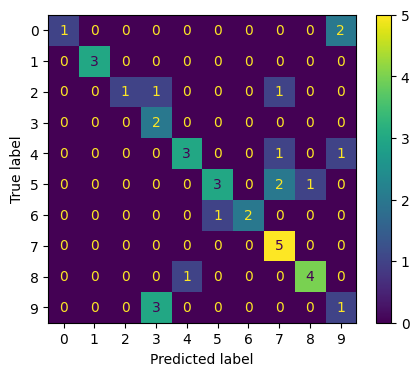

In [ ]:
fig, ax = plt.subplots(figsize = (5,4), dpi = 100) # Outline figure hyperparameters
cm = confusion_matrix(labels, all_predictions)
cmp = ConfusionMatrixDisplay(cm, display_labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]) # Parse in class labels
cmp.plot(ax=ax) # Show the figure